# [DeepSphere]: a spherical convolutional neural network
[DeepSphere]: https://github.com/SwissDataScienceCenter/DeepSphere

[Nathanaël Perraudin](https://perraudin.info), [Michaël Defferrard](http://deff.ch), Tomasz Kacprzak, Raphael Sgier

# Demo: spherical harmonics vs graph Fourier modes

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
from time import time

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import healpy as hp
import pygsp as pg
import itertools

from deepsphere import utils

In [3]:
plt.rcParams['figure.figsize'] = (17, 5)  # (9, 4) for matplotlib notebook

nside = 16
cm = plt.cm.RdBu_r
cm.set_under('w')

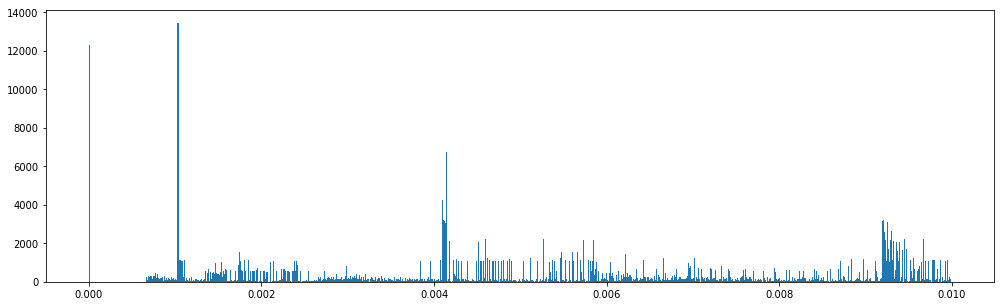

In [4]:
utils.full_healpix_weightmatrix(nside=32, dtype=np.float32, std=0.002, plot=True, max_plot=0.01);

It seems that the first neighbors of a pixel are at a squared distance of less than 0.001; with a standard deviation of $\sigma=0.001$ and by thresholding the weight matrix at $e^{-4\sigma/\sigma}$ I could have a good approximation of the full graph 

2019-04-10 11:59:04,897:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the partial eigendecomposition of a large matrix (12288 x 12288) is expensive. Consider decreasing n_eigenvectors or, if using the Fourier basis to filter, using a polynomial filter instead.


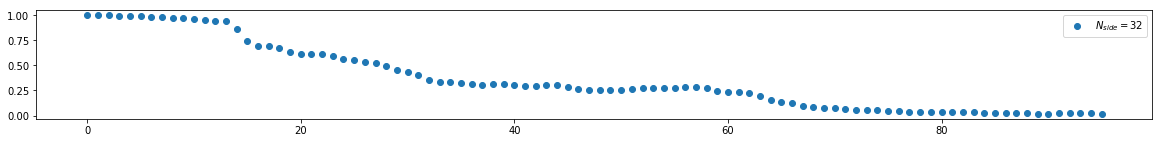

In [5]:
spectral_content = dict()


nside = 32
graph = utils.healpix_graph(nside, dtype=np.float64, std=0.002)  # in NEST order

lmax = 3 * nside - 1
n_harmonics = np.cumsum(np.arange(1, 2*lmax+2, 2))[-1]

graph.compute_fourier_basis(n_eigenvectors=n_harmonics)

cl = np.empty((n_harmonics, lmax+1))
for i in range(n_harmonics):
    eigenvector = hp.reorder(graph.U[:, i], n2r=True)
    cl[i] = hp.sphtfunc.anafast(eigenvector, lmax=lmax)

spectral_content[nside] = np.empty((lmax+1, lmax+1))
start = 0
for ell in range(lmax+1):
    end = start + (2 * ell + 1)
    spectral_content[nside][ell] = np.sum(cl[start:end,:], axis=0)
    start = end

fig2, ax2 = plt.subplots(figsize=(20,2))

sc = spectral_content[nside]
sc = sc / sc[0, 0]

energy_in = np.diag(sc)
ax2.plot(energy_in, 'o', label=rf'$N_{{side}}={nside}$')

ax2.legend();
plt.show()

### comparison with the full graph:

2019-04-11 11:13:38,350:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the partial eigendecomposition of a large matrix (12288 x 12288) is expensive. Consider decreasing n_eigenvectors or, if using the Fourier basis to filter, using a polynomial filter instead.


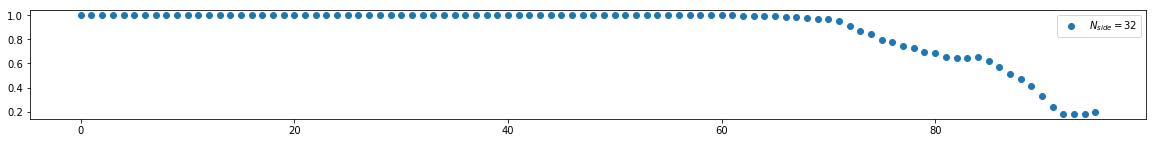

In [5]:
spectral_content = dict()


nside = 32
graph = utils.full_healpix_graph(nside, dtype=np.float64, std=0.002)  # in NEST order

lmax = 3 * nside - 1
n_harmonics = np.cumsum(np.arange(1, 2*lmax+2, 2))[-1]

#print("Threshold: ", k)
#print("Number of neighbours: ", np.mean(np.sum(W>0, axis=1)))
graph.compute_fourier_basis(n_eigenvectors=n_harmonics)

cl = np.empty((n_harmonics, lmax+1))
for i in range(n_harmonics):
    eigenvector = hp.reorder(graph.U[:, i], n2r=True)
    cl[i] = hp.sphtfunc.anafast(eigenvector, lmax=lmax)

spectral_content[nside] = np.empty((lmax+1, lmax+1))
start = 0
for ell in range(lmax+1):
    end = start + (2 * ell + 1)
    spectral_content[nside][ell] = np.sum(cl[start:end,:], axis=0)
    start = end

fig2, ax2 = plt.subplots(figsize=(20,2))

sc = spectral_content[nside]
sc = sc / sc[0, 0]

energy_in = np.diag(sc)
ax2.plot(energy_in, 'o', label=rf'$N_{{side}}={nside}$')

ax2.legend();
plt.show()

/home/gusset/miniconda3/envs/PDMsphere/lib/python3.6/site-packages/scipy/sparse/compressed.py:274: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)
/home/gusset/miniconda3/envs/PDMsphere/lib/python3.6/site-packages/scipy/sparse/compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)
2019-04-12 10:17:21,415:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the partial eigendecomposition of a large matrix (12288 x 12288) is expensive. Consider decreasing n_eigenvectors or, if using the Fourier basis to filter, using a polynomial filter instead.


Threshold:  0.006737946999085467
Number of neighbours:  30.574869791666668


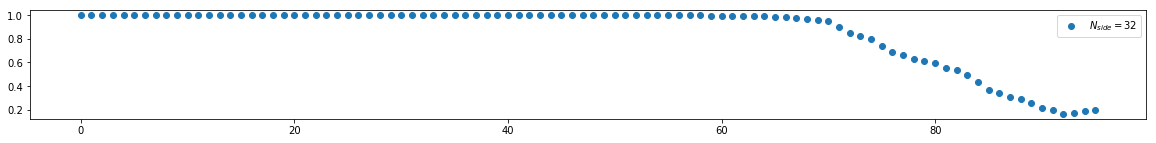

In [4]:
spectral_content = dict()


nside = 32
full_graph = utils.full_healpix_graph(nside, dtype=np.float64, std=0.002)  # in NEST order

lmax = 3 * nside - 1
n_harmonics = np.cumsum(np.arange(1, 2*lmax+2, 2))[-1]

k = np.exp(-5)
W = full_graph.W.copy()
W[W < k] = 0
graph = pg.graphs.Graph(W)

print("Threshold: ", k)
print("Number of neighbours: ", np.mean(np.sum(W>0, axis=1)))
graph.compute_fourier_basis(n_eigenvectors=n_harmonics)

cl = np.empty((n_harmonics, lmax+1))
for i in range(n_harmonics):
    eigenvector = hp.reorder(graph.U[:, i], n2r=True)
    cl[i] = hp.sphtfunc.anafast(eigenvector, lmax=lmax)

spectral_content[nside] = np.empty((lmax+1, lmax+1))
start = 0
for ell in range(lmax+1):
    end = start + (2 * ell + 1)
    spectral_content[nside][ell] = np.sum(cl[start:end,:], axis=0)
    start = end

fig2, ax2 = plt.subplots(figsize=(20,2))

sc = spectral_content[nside]
sc = sc / sc[0, 0]

energy_in = np.diag(sc)
ax2.plot(energy_in, 'o', label=rf'$N_{{side}}={nside}$')

ax2.legend();
plt.show()